<a href="https://colab.research.google.com/github/luiz826/paises_nordicos_covid/blob/main/final_project_checkpoint.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Projeto Final

### Importações Necessárias 

In [ ]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates

### Carregando os Dados

In [ ]:
piramide_sue = pd.read_csv('Sweden-2019.csv')
piramide_nor = pd.read_csv('Norway-2019.csv')
piramide_din = pd.read_csv('Denmark-2019.csv')

mortes_idade_sue = pd.read_csv('Sweden_by_age.csv')
mortes_idade_nor = pd.read_csv('Norway_by_age.csv', sep=';')
mortes_idade_din = pd.read_csv('dinamarc_by_age.csv')


dados_mundiais = pd.read_csv('dados_do_mundo.csv', index_col=0)

densid = pd.read_csv('densidade.csv')

### Transformações Necessárias para os Dados

In [ ]:
HDI = {'Suécia': 0.937, 
      'Noruega': 0.954,
      'Dinamarca': 0.930}
HDI_s = pd.Series(HDI, name='HDI')
DP = {'Suécia':densid.loc[densid['Country Name'] == 'Sweden']['2018'].values[0],
     'Noruega':densid.loc[densid['Country Name'] == 'Norway']['2018'].values[0],
     'Dinamarca':densid.loc[densid['Country Name'] == 'Denmark']['2018'].values[0]}
DP_s = pd.Series(DP, name='PD')

PIB = {'Suécia': 55.840,
       'Noruega':82.500,
      'Dinamarca':63.240}
PIB_s = pd.Series(PIB, name='GDP')

DF_soc = pd.DataFrame([HDI_s, DP_s, PIB_s]) ; DF_soc = DF_soc.T

In [ ]:
sue_data = dados_mundiais.loc[dados_mundiais.Country == 'Sweden']
nor_data = dados_mundiais.loc[dados_mundiais.Country == 'Norway']
din_data = dados_mundiais.loc[dados_mundiais.Country == 'Denmark']

In [ ]:
mortes_idade_nor['Óbitos'] = mortes_idade_nor['Women']+mortes_idade_nor['Men']

In [ ]:
def soma_M_F(dataset):
    return dataset['M']+dataset['F']
piramide_sue['All'] = soma_M_F(piramide_sue)
piramide_nor['All'] = soma_M_F(piramide_nor)
piramide_din['All'] = soma_M_F(piramide_din)

### 1: Elaborar gráficos de barras para comparar as pirâmides etárias entre os países em questão

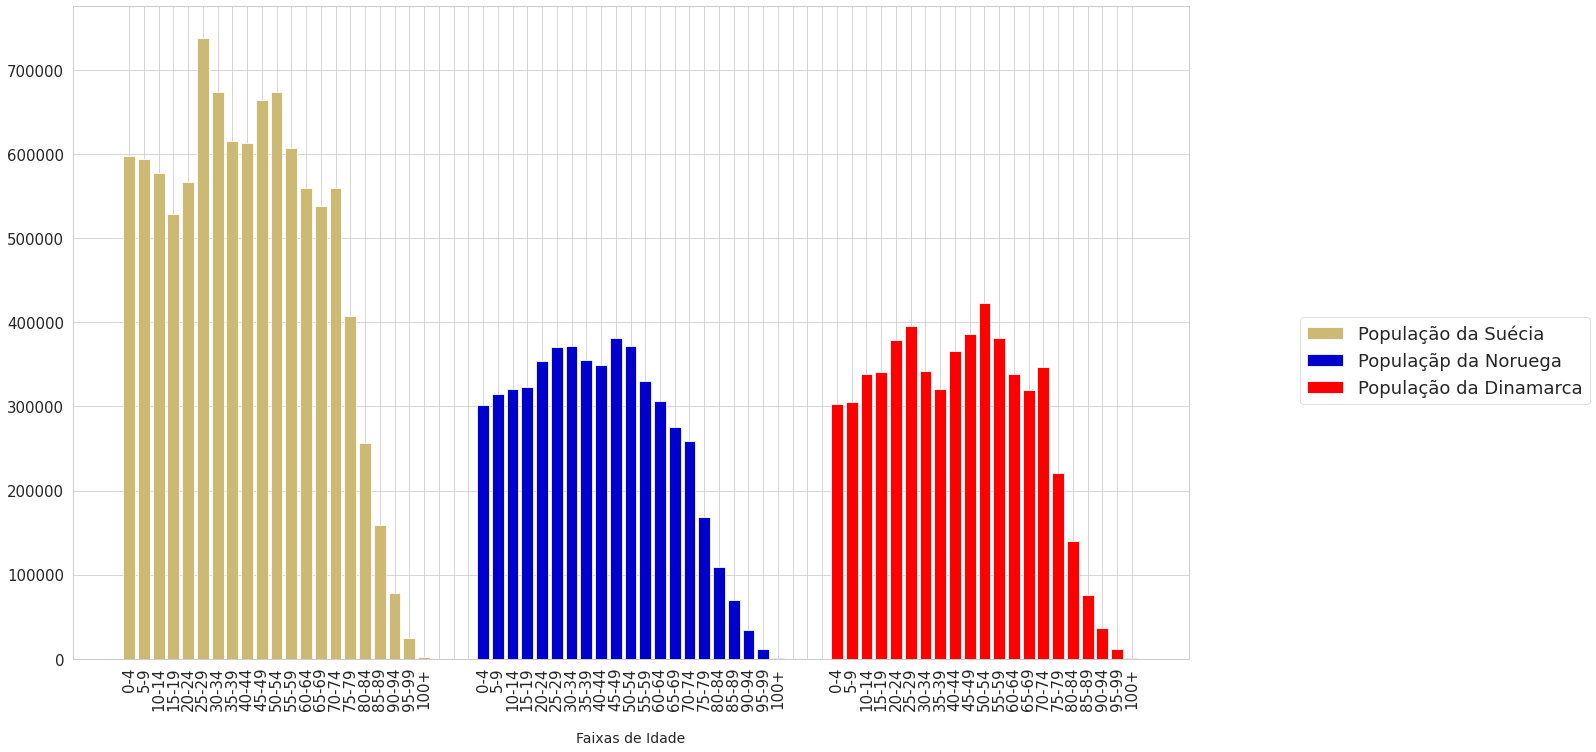

In [ ]:
sns.set(style="whitegrid")
sns.set_context("paper")
fig = plt.figure(figsize=(20, 12))
plt.bar(np.arange(0,21), piramide_sue.All, color='y', label='População da Suécia')
plt.bar(np.arange(24,45), piramide_nor.All, color='mediumblue', label='Populaçãp da Noruega')
plt.bar(np.arange(48,69), piramide_din.All, color='red', label='População da Dinamarca')
plt.xticks(np.arange(0,69), ['0-4', '5-9', '10-14', '15-19', '20-24', '25-29', '30-34', '35-39',
       '40-44', '45-49', '50-54', '55-59', '60-64', '65-69', '70-74',
       '75-79', '80-84', '85-89', '90-94', '95-99', '100+', '','','']*3, rotation=90, fontsize=15)
plt.legend(loc=(1.1,0.39), fontsize=18)
plt.yticks(fontsize=15)
plt.xlabel('\nFaixas de Idade', fontsize=14)
plt.show()

### 2: Elaborar gráficos de barras para comparar os seguintes indicadores sócio-econômicos entre os países em questão: IDH, densidade populacional, PIB per capita;

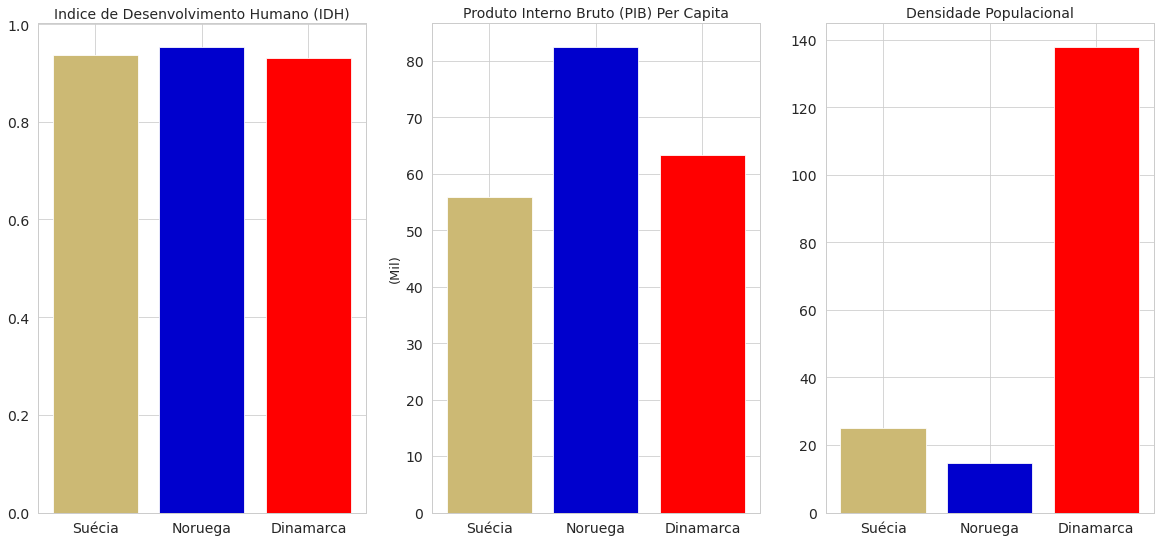

In [ ]:
fig = plt.figure(figsize=(20, 9))
plt.subplot(1,3,1)
plt.bar(DF_soc.index[0], DF_soc.HDI[0], color='y')
plt.bar(DF_soc.index[1], DF_soc.HDI[1], color='mediumblue')
plt.bar(DF_soc.index[2], DF_soc.HDI[2], color='red')
plt.title('Indice de Desenvolvimento Humano (IDH)', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.subplot(1,3,2)
plt.bar(DF_soc.index[0], DF_soc.GDP[0], color='y')
plt.bar(DF_soc.index[1], DF_soc.GDP[1], color='mediumblue')
plt.bar(DF_soc.index[2], DF_soc.GDP[2], color='red')
plt.title('Produto Interno Bruto (PIB) Per Capita', fontsize=14)
plt.ylabel('(Mil)', fontsize=13)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.subplot(1,3,3)
plt.bar(DF_soc.index[0], DF_soc.PD[0], color='y')
plt.bar(DF_soc.index[1], DF_soc.PD[1], color='mediumblue')
plt.bar(DF_soc.index[2], DF_soc.PD[2], color='red')
plt.title('Densidade Populacional', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

### 3: Elaborar gráficos de linhas comparando a curva de mortes nos países em questão colocando como primeiro dia o dia em: 
* (a) houve um total de 10 mortes confirmadas por Covid-19;

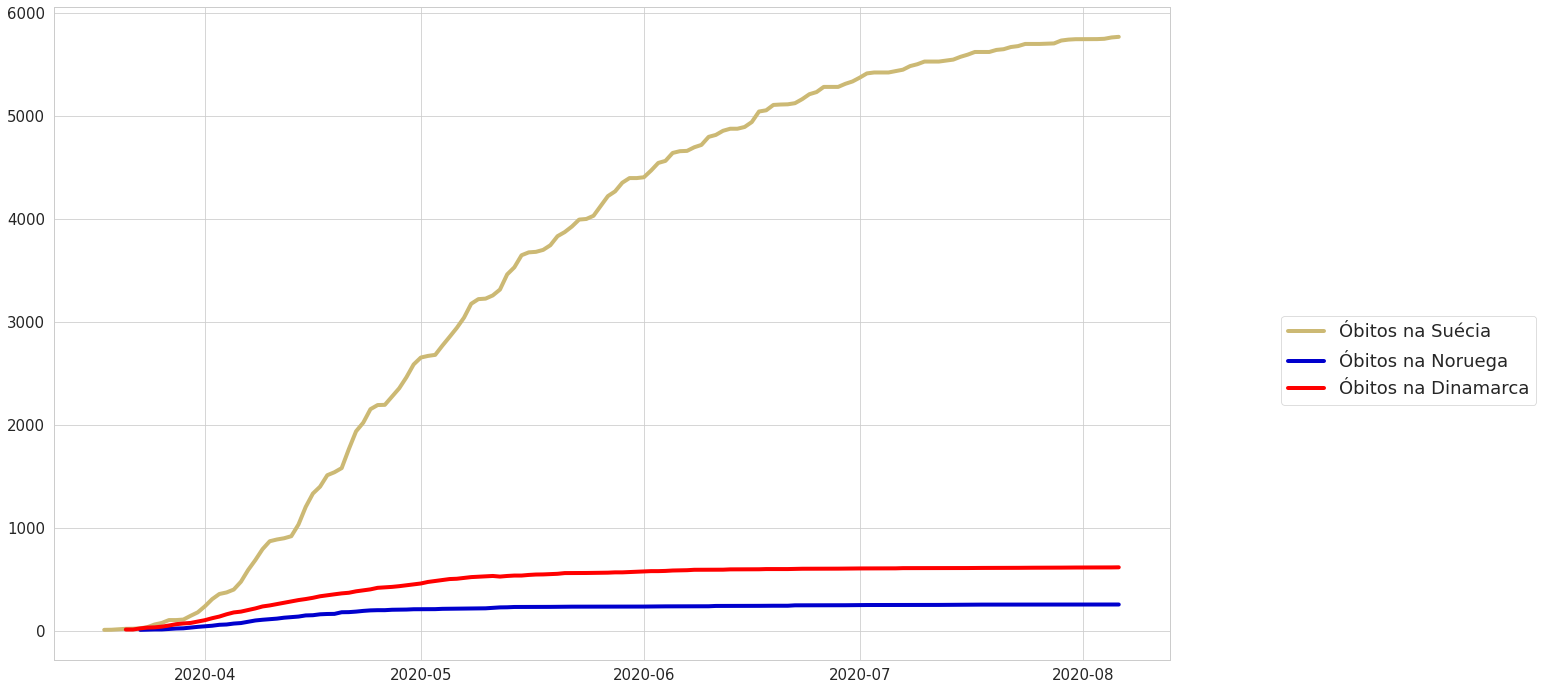

In [ ]:
sue_10 = sue_data.loc[sue_data.Deaths >= 10]
nor_10 = nor_data.loc[nor_data.Deaths >= 10]
din_10 = din_data.loc[din_data.Deaths >= 10]
sue_10.index = pd.to_datetime(sue_10.index) 
nor_10.index = pd.to_datetime(nor_10.index) 
din_10.index = pd.to_datetime(din_10.index) 
fig = plt.figure(figsize=(20, 12))
plt.plot(sue_10.Deaths, color = 'y', lw=4, label='Óbitos na Suécia')
plt.plot(nor_10.Deaths, color='mediumblue', lw=4, label='Óbitos na Noruega')
plt.plot(din_10.Deaths, color='red', lw=4, label='Óbitos na Dinamarca')
plt.legend(loc=(1.1,0.39), fontsize=18)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.show()

* (b) houve um total de 50 mortes confirmadas por Covid-19;

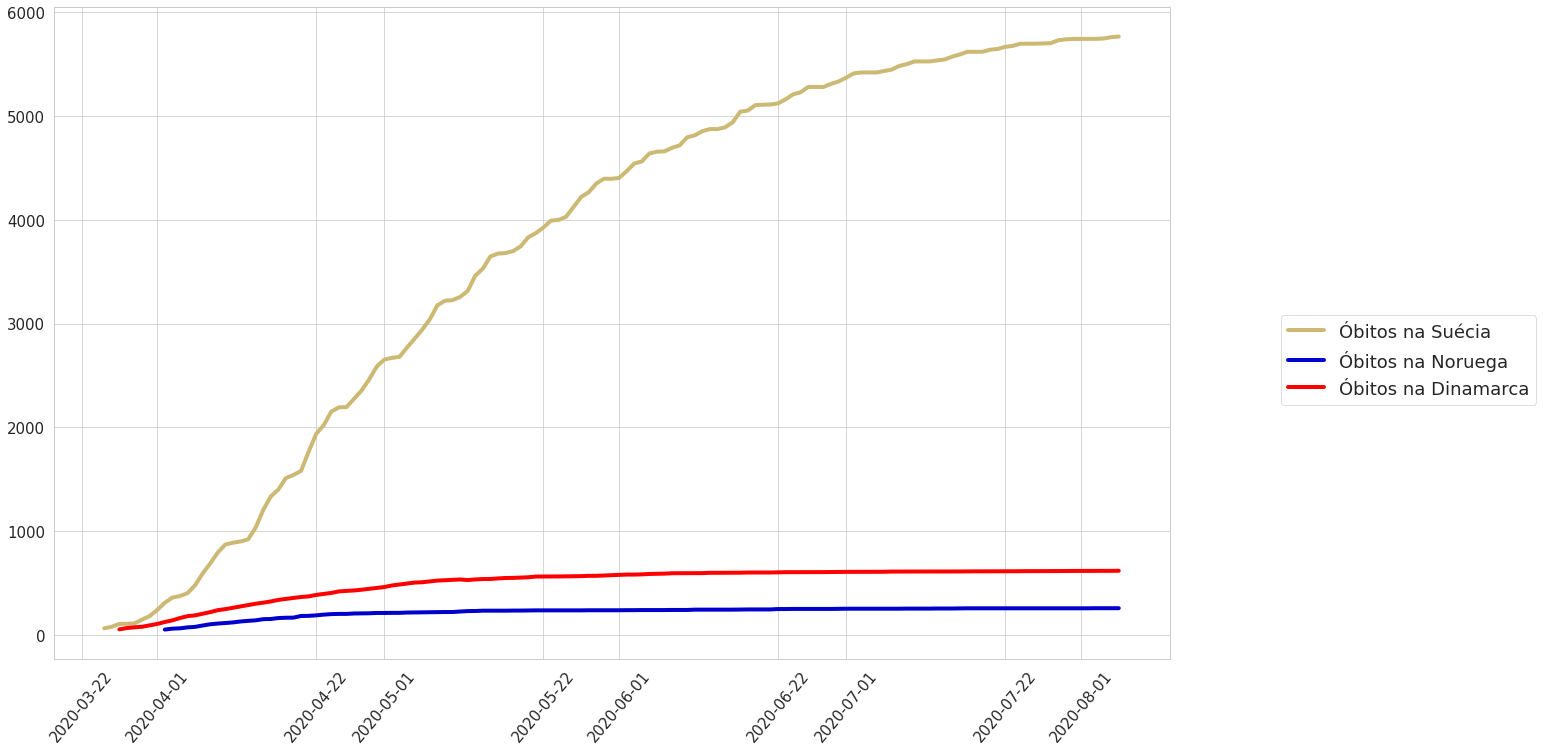

In [ ]:
sue_50 = sue_data.loc[sue_data.Deaths >= 50]
nor_50 = nor_data.loc[nor_data.Deaths >= 50]
din_50 = din_data.loc[din_data.Deaths >= 50]
sue_50.index = pd.to_datetime(sue_50.index) 
nor_50.index = pd.to_datetime(nor_50.index) 
din_50.index = pd.to_datetime(din_50.index) 
fig = plt.figure(figsize=(20, 12))
plt.plot(sue_50.Deaths, color = 'y', lw=4, label='Óbitos na Suécia')
plt.plot(nor_50.Deaths, color='mediumblue', lw=4, label='Óbitos na Noruega')
plt.plot(din_50.Deaths, color='red', lw=4, label='Óbitos na Dinamarca')
plt.legend(loc=(1.1,0.39), fontsize=18)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15, rotation=50)
plt.show()

### 4: Elaborar um gráfico comparando as distribuições dos números de mortes ao longo das diferentes faixas-etárias nos diferentes países.

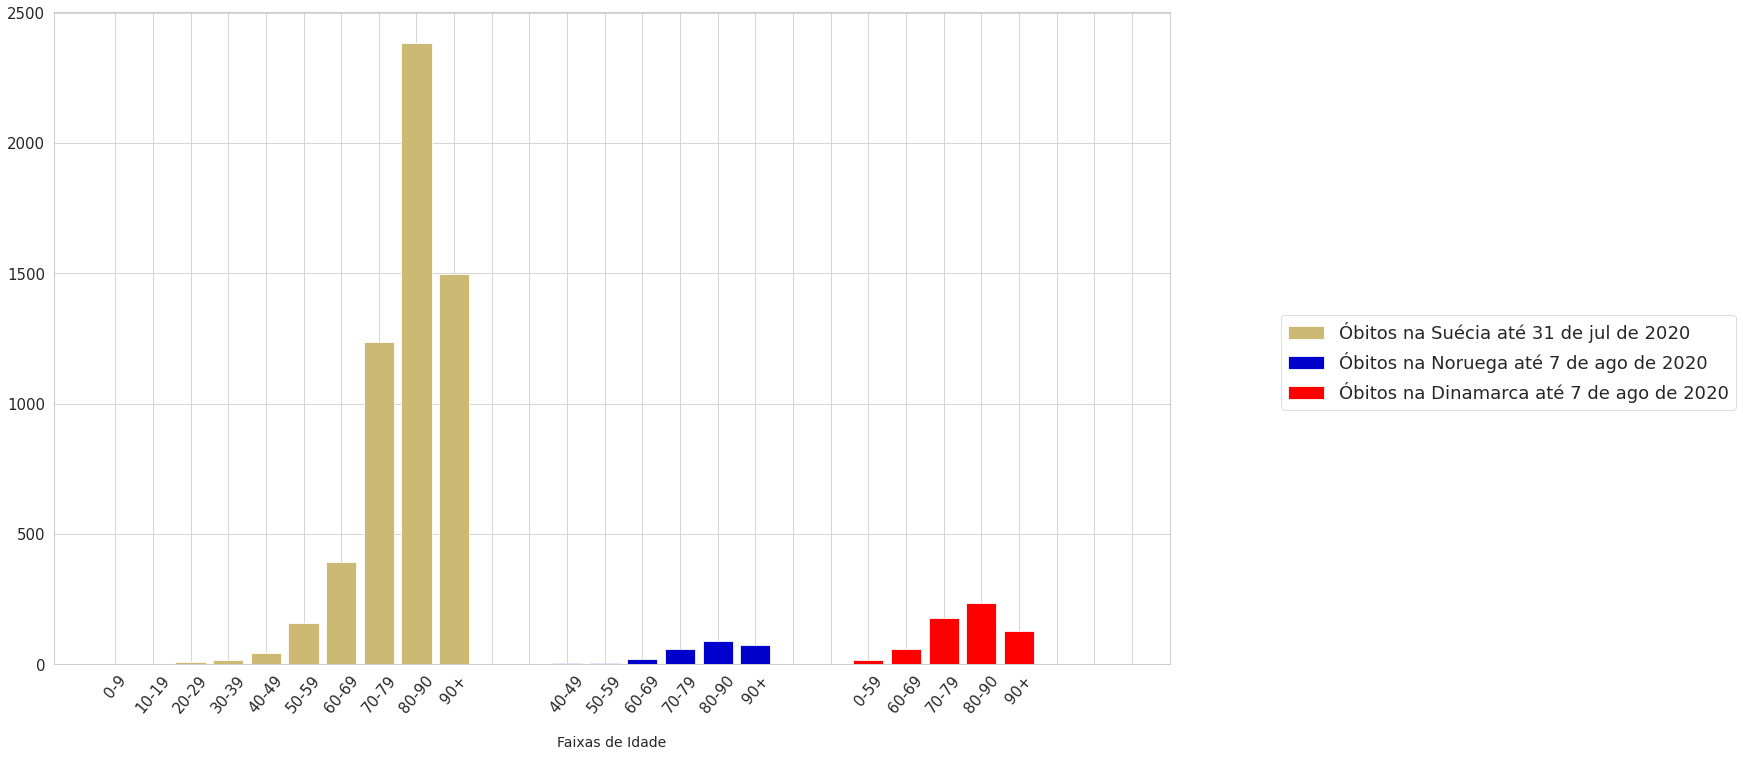

In [ ]:
fig = plt.figure(figsize=(20, 12))
plt.bar(np.arange(0,10), mortes_idade_sue.Óbitos, color='y', label='Óbitos na Suécia até 31 de jul de 2020')
plt.bar(np.arange(12,18), mortes_idade_nor.Óbitos, color='mediumblue', label='Óbitos na Noruega até 7 de ago de 2020')
plt.bar(np.arange(20,25), mortes_idade_din.Óbitos, color='red', label='Óbitos na Dinamarca até 7 de ago de 2020')
plt.legend(loc=(1.1,0.39), fontsize=18)
plt.xticks(np.arange(0,29), ['0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69',
       '70-79', '80-90', '90+', '','','40-49', '50-59', '60-69',
       '70-79', '80-90', '90+', '', '', '0-59', '60-69', '70-79', '80-90', '90+'], rotation=50, fontsize=15)
plt.xlabel('\nFaixas de Idade', fontsize=14)
plt.yticks(fontsize=15)
plt.show()